TP4 : Travail final


In [ ]:
import os
import PyPDF2
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from thefuzz import fuzz
from thefuzz import process
import yake
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from rapidfuzz import process, fuzz
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [178]:
#Lister les fichiers 
path = '../../data/camille_ecologie'

files = []
for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)):
        files.append(f)

for f in files:
    print(f)


all.txt
BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt
BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt
BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt
BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt
BE-KBR00_15463334_19890701_137_00_00_0_01_0079_29699927.txt
KB_JB1051_1945-12-18_01-00003.txt
KB_JB1051_1951-09-05_01-00005.txt
KB_JB1051_1952-12-17_01-00004.txt
KB_JB1051_1952-12-26_01-00004.txt
KB_JB1051_1954-04-01_01-00004.txt
KB_JB1051_1958-10-15_01-00004.txt
KB_JB1051_1959-06-12_01-00001.txt
KB_JB1051_1961-03-07_01-00001.txt
KB_JB1051_1961-04-20_01-00001.txt
KB_JB1051_1961-11-20_01-00003.txt
KB_JB1051_1966-03-03_01-00002.txt
KB_JB421_1901-02-18_01-00001.txt
KB_JB421_1905-04-27_01-00001.txt
KB_JB421_1906-10-08_01-00002.txt
KB_JB421_1909-09-20_01-00001.txt
KB_JB421_1909-11-14_01-00003.txt
KB_JB421_1910-04-24_01-00002.txt
KB_JB421_1910-06-01_01-00003.txt
KB_JB427_1919-11-24_01-00002.txt
KB_JB427_1920-02-03_01-00004.txt
KB_JB427_1920-03-27_01

In [179]:
#Sauvgarde de tout les fichiers dans all.txt
txt_path = "../../data/camille_ecologie"

with open("../../data/camille_ecologie/all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt") and file != "_README.txt":
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())
                output_file.write("\n")   


Exploration

In [180]:
#Lister les années de parytion des articles lié à l'écologie
path = "../../data/camille_ecologie"
files = sorted(os.listdir(path))
print(f"{len(files)} files found.")

784 files found.


In [181]:

count_newspapers = defaultdict(int)

# Dictionnaire pour mapper les codes aux noms des journaux
journal_names = {
    'JB421': "L'Avenir du Luxembourg",
    'JB427': "La Libre Belgique",
    'JB555': "L'Indépendance belge",
    'JB555A': "L'Indépendance belge (édité en Angleterre)",
    'JB567': "Journal de Bruxelles",
    'JB572': "Journal de Charleroi",
    'JB638': "La Meuse",
    'JB685': "Le Petit Bleu",
    'JB729': "Le Vingtième Siècle",
    'JB773': "Vers l'Avenir",
    'JB837': "Le Peuple",
    'JB838': "Le Soir",
    'JB1051': "Le Drapeau rouge",
    'B14138': "La Presse"
}

# Parcours des fichiers
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        elems = f.split("_")
        # Cherche dans tous les éléments si l'un correspond à un code de journal
        journal_code = next((e for e in elems if e in journal_names), None)
        if journal_code:
            count_newspapers[journal_code] += 1

# Affichage des statistiques
for code, name in journal_names.items():
    print(f"{name} : {count_newspapers.get(code, 0)}")
    values = np.array([count_newspapers.get(code, 0) for code in journal_names])

# Calcul de la moyenne
mean_value = np.mean(values)

# Calcul de la médiane
median_value = np.median(values)

std_value = np.std(values)

var_value = np.var(values)
total = values.sum()
percentages = {journal_names[code]: (count_newspapers.get(code, 0)/total)*100 
               for code in journal_names}
cv = std_value / mean_value
print("\n--- Part relative de chaque journal (en % du corpus) ---")
print(f"Moyenne des publications par journal : {mean_value:.2f}")
print(f"Médiane des publications par journal : {median_value:.2f}")
print(f"Écart-type : {std_value:.2f}")
print(f"Variance : {var_value:.2f}")
print(f"Minimum : {values.min()} documents")
print(f"Maximum : {values.max()} documents")
print(f"Coefficient de variation : {cv:.2f}")
print("\n--- Statistiques globales ---") 
for name, pct in percentages.items():
    print(f"{name} : {pct:.2f}% du corpus")



L'Avenir du Luxembourg : 7
La Libre Belgique : 319
L'Indépendance belge : 86
L'Indépendance belge (édité en Angleterre) : 3
Journal de Bruxelles : 62
Journal de Charleroi : 32
La Meuse : 74
Le Petit Bleu : 10
Le Vingtième Siècle : 30
Vers l'Avenir : 44
Le Peuple : 20
Le Soir : 79
Le Drapeau rouge : 11
La Presse : 0

--- Part relative de chaque journal (en % du corpus) ---
Moyenne des publications par journal : 55.50
Médiane des publications par journal : 31.00
Écart-type : 78.44
Variance : 6152.39
Minimum : 0 documents
Maximum : 319 documents
Coefficient de variation : 1.41

--- Statistiques globales ---
L'Avenir du Luxembourg : 0.90% du corpus
La Libre Belgique : 41.06% du corpus
L'Indépendance belge : 11.07% du corpus
L'Indépendance belge (édité en Angleterre) : 0.39% du corpus
Journal de Bruxelles : 7.98% du corpus
Journal de Charleroi : 4.12% du corpus
La Meuse : 9.52% du corpus
Le Petit Bleu : 1.29% du corpus
Le Vingtième Siècle : 3.86% du corpus
Vers l'Avenir : 5.66% du corpus
Le

In [182]:
#Lister les années de parution des articles lié à l'écologie 
all_years = [str(year) for year in range(1887, 1990)]
print(all_years)

['1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']


In [183]:
#Lister les années pour lesquels il ny a pas de parution d'articles lié à l'écologie 
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1893, 1917, 1941, 1943, 1953, 1962, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988


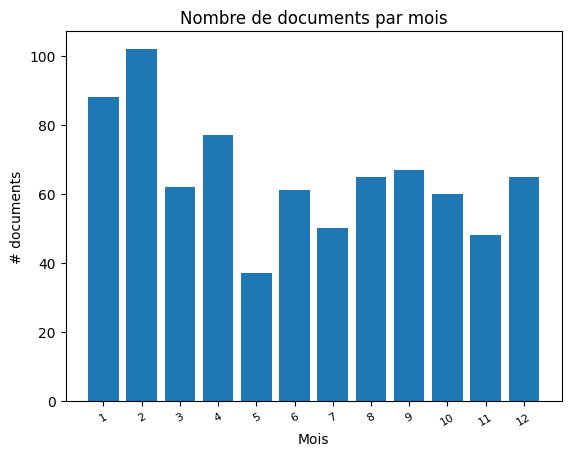

In [184]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, sorted(count_month.keys()), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

Fréquences

In [185]:
mot_cible = "ecologi".lower()
total_occurrences = 0

for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()
            total_occurrences += contenu.count(mot_cible)

print(f"Le mot '{mot_cible}' apparaît {total_occurrences} fois au total dans le corpus.")

Le mot 'ecologi' apparaît 82 fois au total dans le corpus.


In [213]:
i=0
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()  
            if mot_cible in contenu:
                i+=1
print(f"Le mot '{mot_cible}' apparaît dans {i} documents.")

Le mot 'ecologi' apparaît dans 41 documents.


In [212]:
data_path = "../../data/camille_ecologie/all.txt"
LIMIT = 50000000
text = open(data_path, "r", encoding="utf-8").read()[:LIMIT]

tokens = nltk.wordpunct_tokenize(text)
print(f"{len(tokens)} words (tokens) found")

vocab = set(tokens)
print(f"{len(vocab)} different word forms")

7358062 words (tokens) found
414599 different word forms


In [214]:
word = "ecologie"
process.extract(word, vocab, limit=45)

[('ecologie', 100.0, 53496),
 ('ecrologie', 94.11764705882352, 3935),
 ('eicologie', 94.11764705882352, 152727),
 ('mecologie', 94.11764705882352, 217330),
 ('echologie', 94.11764705882352, 398859),
 ('eologie', 93.33333333333333, 32731),
 ('cologie', 93.33333333333333, 280512),
 ('colo', 90.0, 3085),
 ('og', 90.0, 7014),
 ('c', 90.0, 10543),
 ('ec', 90.0, 16140),
 ('olo', 90.0, 71732),
 ('l', 90.0, 78856),
 ('e', 90.0, 122317),
 ('eco', 90.0, 135854),
 ('gie', 90.0, 192084),
 ('ie', 90.0, 195209),
 ('o', 90.0, 234918),
 ('co', 90.0, 235908),
 ('ogi', 90.0, 280981),
 ('g', 90.0, 288614),
 ('col', 90.0, 297498),
 ('i', 90.0, 305132),
 ('ogie', 90.0, 327980),
 ('log', 90.0, 343973),
 ('logi', 90.0, 349742),
 ('logie', 90.0, 376275),
 ('gi', 90.0, 384051),
 ('lo', 90.0, 393290),
 ('ol', 90.0, 393994),
 ('ceologie', 87.5, 9890),
 ('jcologie', 87.5, 16114),
 ('écologie', 87.5, 22263),
 ('rcologie', 87.5, 24898),
 ('Ceologie', 87.5, 52512),
 ('Écologie', 87.5, 78195),
 ('eiologie', 87.5, 113

Mots clés

In [189]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [ ]:
files = [
    f for f in sorted(os.listdir(path))
    if os.path.isfile(os.path.join(path, f))
    and f not in ["_README.txt", "all.txt"]
]

all_keywords = []

for f in files:
    text = open(os.path.join(path, f), 'r', encoding="utf-8").read()
    
    keywords = kw_extractor.extract_keywords(text)
    kept = [kw for kw, score in keywords if len(kw.split()) == 2]
    
    print(f"{f} mentions these keywords: {', '.join(kept)}...")
    
    all_keywords.extend(kept)  # ajouter les mots-clés au fichier "keywords.txt"

# Écrire tous les mots-clés dans keywords.txt
with open(os.path.join(path, "keywords.txt"), "w", encoding="utf-8") as f:
    for kw in all_keywords:
        f.write(kw + "\n")

print(f"\nAll keywords saved in keywords.txt ({len(all_keywords)} keywords).")

BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt mentions these keywords: fut occupée, exposition organisée, Congrès RAI, Expo ’79...
BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt mentions these keywords: réservé exclusivement, jour fut, fut réservé, fut occupée, tribune installée, L'utilisation écono, Nouveaux supports, montra clairement, informations quotidiennes, lauditoire participèêrent, participèêrent également, président montra, d'une entreprise...
BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt mentions these keywords: d'où classement, d'une nouvelle, mauvais classement, fort difficile, permettre l'accès, révéler fort, chemises prises, localisation d'une, classement lors, place requise, créations d'un, d'un fichier, journaux pose, nouvelle n'existant, perdent suite, d'une installation, besoin d'une, oeuvre d'une, cartes porte-microfilms, Avantages d'une...
BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt mentions these keywords: ON

In [207]:
target_keywords = [
    "énergie solaire",    "forêts tropicales",    "déchets plastiques",    "changement climatique",    "réchauffement climatique",
    "énergies renouvelables",    "transition énergétique",    "biodiversité menacée",    "pollution atmosphérique",    "gestion durable",
    "empreinte carbone",    "protection environnementale",    "réduction déchets",    "déforestation illégale",    "espèces menacées",
    "eau potable",    "agriculture biologique",    "réchauffement global",    "gaz à effet de serre",    "économie circulaire",    "développement durable",
    "pesticides chimiques",    "acidification océans",    "extinction espèces",    "forêts primaires",    "protection faune",    "protection flore",
    "réserve naturelle",    "pollution plastique",    "ressources naturelles",    "chasse illégale",    "incendies forêt",    "érosion sol",
    "biodiversité marine",    "recyclage déchets",    "compensation carbone",    "zones humides",    "énergies fossiles",    "éducation environnementale",
    "réchauffement polaire",    "catastrophes naturelles",    "surpêche",    "préservation nature",    "pollution industrielle",    "transition écologique",
    "mobilité durable",    "impact environnemental",    "solutions écologiques","écologie politique",    "écologie urbaine",    "écologie industrielle",
    "écologie sociale",    "écologie marine",    "écologie forestière",    "écologie humaine",    "transition écologique",    "solutions écologiques",    "préservation écologique"
]
for f in sorted(files):
    if f in ["_README.txt", "all.txt"]:
        continue

    file_path = os.path.join(data_path, f)
    with open(file_path, 'r', encoding="utf-8") as file:
        text = file.read()

    # Extraire les mots-clés
    keywords = kw_extractor.extract_keywords(text)

    # Garder uniquement les mots-clés composés de 2 mots
    kept = [kw for kw, score in keywords if kw in target_keywords]

    if kept:
        print(f"{f} mentions these keywords: {', '.join(kept)}")

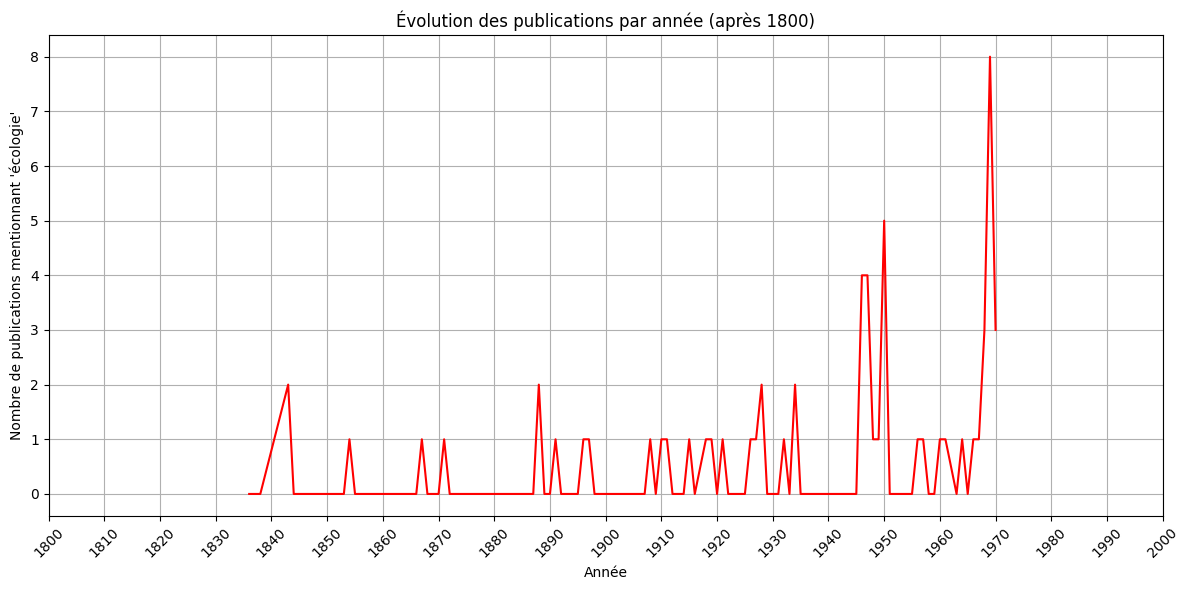

In [209]:
# Publication par année
year_counts = Counter()
for f in files:
    file_path = os.path.join(path, f)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
    
    # Extraire l'année depuis le nom de fichier (ex: 1946 dans "article_1946.txt")
    match = re.search(r'(\d{4})', f)
    if match:
        year = int(match.group(1))
        count = text.count('écologie')
        year_counts[year] += count

# Trier les années et filtrer celles >= 1800
years = sorted([y for y in year_counts.keys() if y >= 1800])
counts = [year_counts[y] for y in years]

# Créer le graphique en courbe continue
plt.figure(figsize=(12,6))
plt.plot(years, counts, linestyle='-', color='red')  # ligne continue
plt.xlabel("Année")
plt.ylabel("Nombre de publications mentionnant 'écologie'")
plt.title("Évolution des publications par année (après 1800)")
plt.grid(True)

# Graduations tous les 50 ans à partir de 1800
start_year = 1800
end_year = (max(years) // 50 + 1) * 50
plt.xticks(range(start_year, end_year + 1, 10), rotation=45)

plt.tight_layout()
plt.show()

Entités nommées

In [215]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)

In [216]:
# Définir la plage d'années
start_year = 1945
end_year = 1950

In [225]:
all_files1945_1950 =os.listdir(path)
# Filtrer les fichiers correspondant à la plage d'années
files_in_range = []
for f in all_files1945_1950:
    # Extraire l'année depuis le nom (ex: KB_JB421_1905-04-27_01-00001)
    match = re.search(r'_(\d{4})-', f)
    if match:
        year = int(match.group(1))
        if start_year <= year <= end_year:
            files_in_range.append(f)
print(f"Il existe {len(files_in_range)} fichiers dans la plage choisie.")

# Afficher les fichiers filtrés
print(f"Total des fichiers entre {start_year} et {end_year} :")
for f in sorted(files_in_range):
    print(f)

Il existe 306 fichiers dans la plage choisie.
Total des fichiers entre 1945 et 1950 :
KB_JB1051_1945-12-18_01-00003.txt
KB_JB427_1945-01-07_01-00003.txt
KB_JB427_1945-11-14_01-00003.txt
KB_JB427_1946-01-24_01-00004.txt
KB_JB427_1946-04-04_01-00004.txt
KB_JB427_1946-09-16_01-00004.txt
KB_JB427_1946-12-01_01-00004.txt
KB_JB427_1947-02-15_01-00004.txt
KB_JB427_1947-03-19_01-00006.txt
KB_JB427_1947-05-18_01-00005.txt
KB_JB427_1947-07-20_01-00004.txt
KB_JB427_1947-07-25_01-00005.txt
KB_JB427_1947-08-03_01-00005.txt
KB_JB427_1947-08-13_01-00005.txt
KB_JB427_1947-11-01_01-00005.txt
KB_JB427_1947-11-12_01-00005.txt
KB_JB427_1947-11-13_01-00006.txt
KB_JB427_1947-11-15_01-00005.txt
KB_JB427_1947-11-16_01-00006.txt
KB_JB427_1947-11-26_01-00005.txt
KB_JB427_1947-12-09_01-00005.txt
KB_JB427_1947-12-16_01-00005.txt
KB_JB427_1947-12-17_01-00006.txt
KB_JB427_1947-12-19_01-00006.txt
KB_JB427_1947-12-21_01-00004.txt
KB_JB427_1947-12-28_01-00004.txt
KB_JB427_1948-01-11_01-00005.txt
KB_JB427_1948-01-16_01

In [226]:
txts = [
    f for f in os.listdir(txt_path)
    if os.path.isfile(os.path.join(txt_path, f)) 
    and any(str(y) in f for y in range(start_year, end_year + 1))
]
len(txts)

306

In [241]:
temp_path = "../../data/tmp"

# Créer le dossier temporaire s'il n'existe pas
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

# Nom du fichier temporaire 
temp_file_name = "1945_1950.txt"

# Lire le contenu de tous les fichiers dans txts
content_list = []
for f in txts:
    with open(os.path.join(txt_path, f), 'r', encoding='utf-8') as file:
        content_list.append(file.read())

# Écrire tout le contenu dans le fichier temporaire
temp_file_path = os.path.join(temp_path, temp_file_name)
with open(temp_file_path, 'w', encoding='utf-8') as f_out:
    f_out.write(' '.join(content_list))

print(f"Fichier temporaire créé : {temp_file_path}")

Fichier temporaire créé : ../../data/tmp\1945_1950.txt


In [242]:
input_file = os.path.join(temp_path, "1945_1950.txt")
output_file = os.path.join(temp_path, "clean1945_1950.txt")

def clean_text(stopwords):

    with open(input_file, 'r', encoding='utf-8') as f:
        text = f.read()
    
    words = nltk.wordpunct_tokenize(text)
    kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in stopwords]
    kept_string = " ".join(kept)
    
    with open(output_file, 'w', encoding='utf-8') as out_f:
        out_f.write(kept_string)
    
    return f"Fichier nettoyé créé : {output_file}"

In [243]:
clean_text(sw)

'Fichier nettoyé créé : ../../data/tmp\\clean1945_1950.txt'

In [252]:

with open(output_file, 'r', encoding='utf-8') as f:
    after = f.read()

frequencies = Counter(after.split())

print(frequencies.most_common(1000))

[('RUE', 3673), ('BRUXELLES', 3441), ('LIEU', 3313), ('ANS', 3129), ('PART', 2755), ('ÉGLISE', 2432), ('SAINT', 2375), ('PRIX', 2347), ('HEURES', 2086), ('SERVICE', 2060), ('DIMANCHE', 2050), ('BELGIQUE', 2035), ('MME', 2003), ('GRAND', 1923), ('MONSIEUR', 1877), ('PRÉSIDENT', 1848), ('GUERRE', 1830), ('LEURS', 1747), ('COURS', 1713), ('DÉCÈS', 1661), ('MADAME', 1649), ('SAMEDI', 1625), ('ANNÉE', 1578), ('TRÈS', 1540), ('CONSEIL', 1533), ('SAINTE', 1499), ('ANNONCER', 1484), ('LUNDI', 1477), ('ORDRE', 1436), ('AVIS', 1436), ('MARDI', 1403), ('BELGE', 1393), ('FAMILLE', 1380), ('GÉNÉRAL', 1378), ('JEAN', 1370), ('JOURS', 1360), ('ENFANTS', 1336), ('JEUDI', 1313), ('NOVEMBRE', 1308), ('OCTOBRE', 1273), ('ABBÉ', 1264), ('MORT', 1259), ('VENDREDI', 1256), ('FRANCE', 1254), ('PAYS', 1253), ('LIÈGE', 1248), ('PRÉSENT', 1232), ('GRANDE', 1229), ('MERCREDI', 1228), ('ANVERS', 1224), ('RÉUNION', 1222), ('PRIE', 1209), ('AOÛT', 1190), ('DÉCEMBRE', 1185), ('MGR', 1184), ('MARIE', 1160), ('INHUMAT

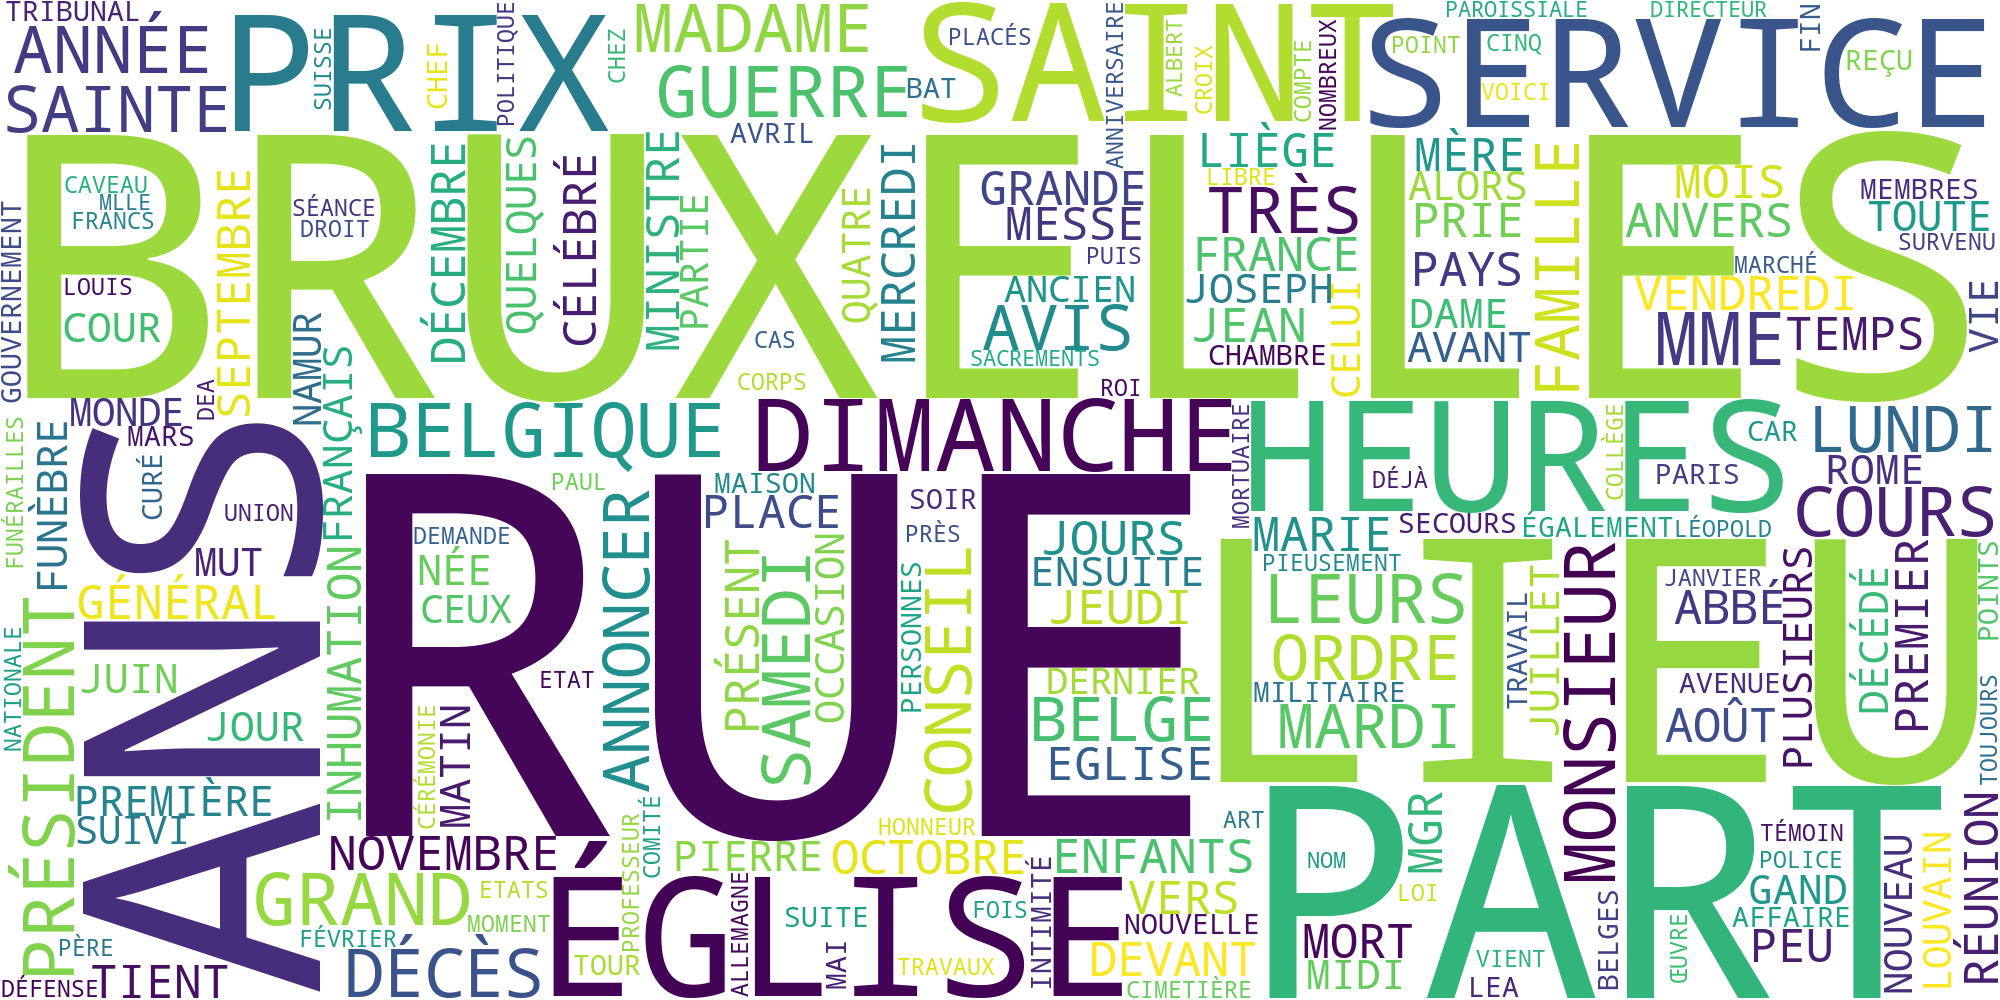

In [253]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [249]:

with open(output_file, 'r', encoding='utf-8') as f:
    words = f.read().split()  

target = "ÉCOLOGIE"
threshold = 80

similar_words = [w for w in words if fuzz.ratio(w, target) >= threshold]

frequencies = Counter(similar_words)

print(frequencies.most_common())

all_similar_words = list(frequencies.elements())

print(f"\nNombre total de mots similaires trouvés : {len(all_similar_words)}")
print(all_similar_words[:20])  

[('ECROLOGIE', 283), ('COLONIE', 110), ('THÉOLOGIE', 60), ('COLOGNE', 42), ('ÉCOLOGIE', 14), ('ÉCOLIER', 7), ('COLOGIE', 5), ('IDÉOLOGIE', 4), ('ÉCOLAGE', 1), ('GÉOLOGIE', 1), ('CHÉOLOGIE', 1), ('ECHOLOGIE', 1), ('PÉDOLOGIE', 1), ('ROLOGIE', 1), ('CHOLOGIE', 1), ('NÉOLOGIE', 1), ('GYNÉCOLOGIE', 1), ('COLOGIQUE', 1), ('ECOLOGIE', 1), ('ECEOLOGIE', 1), ('MECOLOGIE', 1)]

Nombre total de mots similaires trouvés : 538
['COLOGIE', 'COLOGIE', 'COLOGIE', 'COLOGIE', 'COLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE']
